In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.stats as stats
import seaborn as sb



In [27]:
data = pd.read_csv("C:/Users/galla/OneDrive/Documents/DataScience/archive/US_youtube_trending_data.csv")

In [28]:
data


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196985,Eit_e2BRJfI,FIRST EASTER AT OUR HOUSE!!,2023-04-12T21:07:12Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2023-04-19T00:00:00Z,[None],304151,13511,0,593,https://i.ytimg.com/vi/Eit_e2BRJfI/default.jpg,False,False,Buy One Get One FREE on cases and battery pack...
196986,3UKtB1mQgFI,RogersBase Reacts - TEARS OF THE KINGDOM Final...,2023-04-13T15:09:35Z,UCwp61vhrXzXdobn5czTFaaw,RogersBase,20,2023-04-19T00:00:00Z,rogersbase|rogerbase|rogers base|ロジャニキ|roger b...,141787,6781,0,407,https://i.ytimg.com/vi/3UKtB1mQgFI/default.jpg,False,False,RogersBase's live reaction from Italy to the F...
196987,1UpTnPf57Gk,Peso Pluma - Recap TOYOTA Arena,2023-04-12T19:00:07Z,UCzrM_068Odho89mTRrrxqbA,Peso Pluma,22,2023-04-19T00:00:00Z,pesopluma|ladoblep,1022503,25881,0,675,https://i.ytimg.com/vi/1UpTnPf57Gk/default.jpg,False,False,Gracias a todos por apoyarme en mi primer show...
196988,KwE_ZKlt8qo,i lost.,2023-04-12T16:54:10Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,22,2023-04-19T00:00:00Z,jake paul,914178,26667,0,3175,https://i.ytimg.com/vi/KwE_ZKlt8qo/default.jpg,False,False,Sign up now for presale access to #PaulDiazhtt...


In [51]:
print(data.isnull().sum())

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
log_likes            0
likes_transformed    0
dtype: int64


In [31]:
data["description"] = data["description"].fillna(value="")

In [50]:
print(data.isnull().sum())

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
log_likes            0
likes_transformed    0
dtype: int64


In [33]:
data.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,196990.000000,1.969900e+05,1.969900e+05,196990.000000,1.969900e+05
mean,18.802701,2.501961e+06,1.294158e+05,1547.687928,1.077914e+04
std,6.760505,7.108044e+06,4.093035e+05,9365.995788,8.173570e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.781905e+05,1.857300e+04,0.000000,1.326250e+03
50%,20.000000,9.649690e+05,4.264300e+04,0.000000,2.931000e+03
75%,24.000000,2.162064e+06,1.061385e+05,853.000000,6.911000e+03
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06


In [34]:
likes = data["likes"]

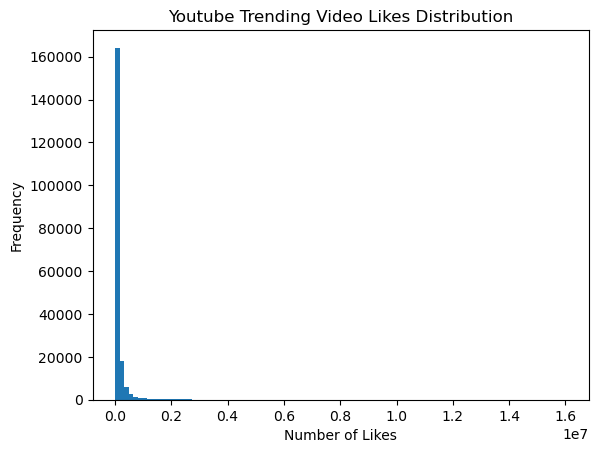

In [35]:
plt.hist(likes, bins = 100) 
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.title("Youtube Trending Video Likes Distribution")
plt.show()